## Problem Statement :- 
#### Forecast the Airlines Passengers data set. Prepare a document for each model explaining  how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [2]:
airline_data = pd.read_excel('Airlines+Data.xlsx',sheet_name='Sheet1')
airline_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
airline_data.index = airline_data['Month']

In [5]:
airline_data.drop('Month',axis=1,inplace=True)
airline_data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [6]:
airline_data.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


In [7]:
airline_data.shape

(96, 1)

In [8]:
airline_data.isnull().sum()

Passengers    0
dtype: int64

### EDA

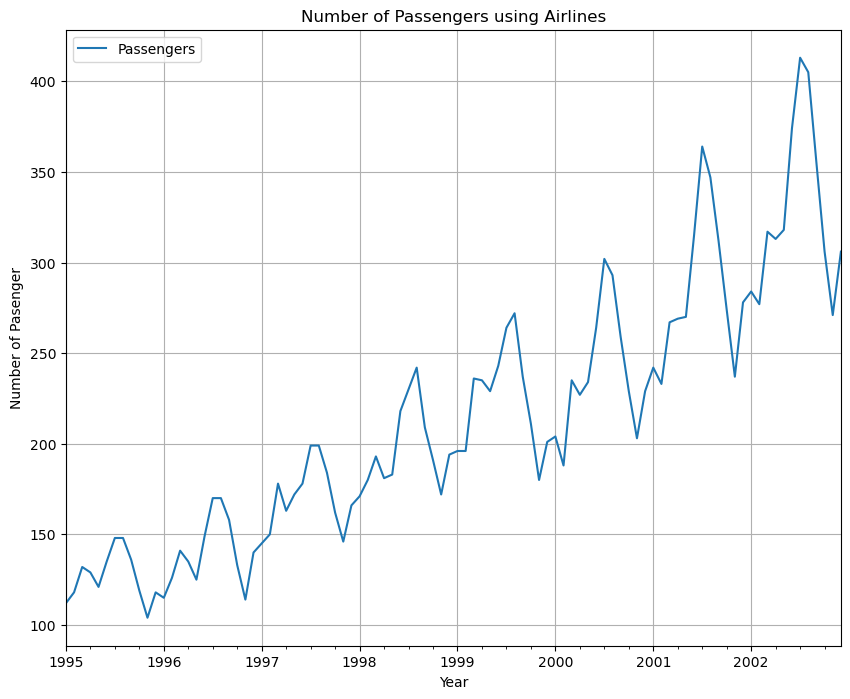

In [10]:
airline_data.plot(figsize = (10,8))
plt.title("Number of Passengers using Airlines")
plt.xlabel("Year")
plt.ylabel("Number of Pasenger")
plt.grid()

In [11]:
print(round(airline_data.describe()))

       Passengers
count        96.0
mean        214.0
std          72.0
min         104.0
25%         156.0
50%         200.0
75%         265.0
max         413.0


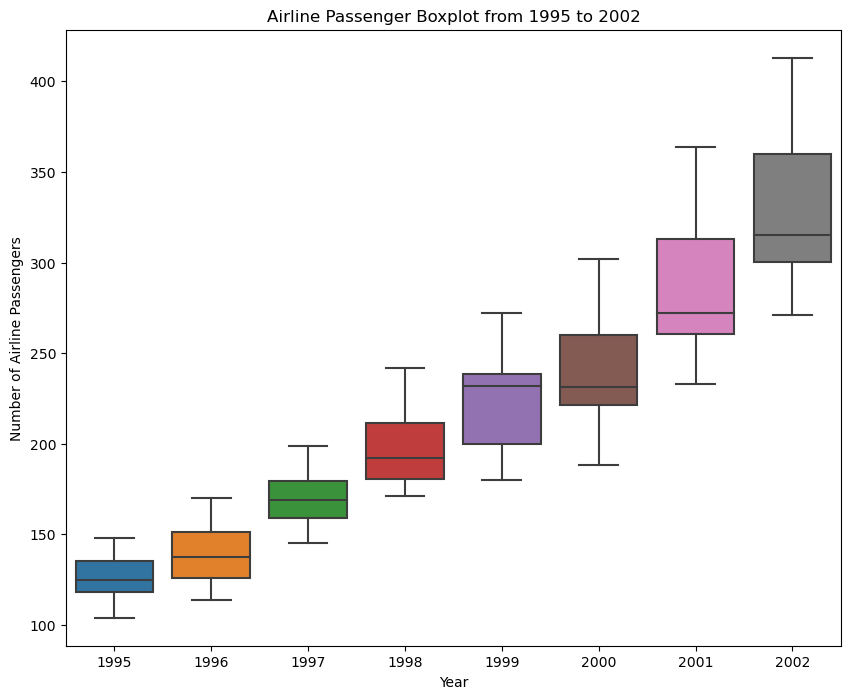

In [12]:
_,ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=airline_data.index.year, y = airline_data.Passengers,ax=ax)
plt.title("Airline Passenger Boxplot from 1995 to 2002")
plt.xlabel("Year")
plt.ylabel("Number of Airline Passengers")
plt.show()

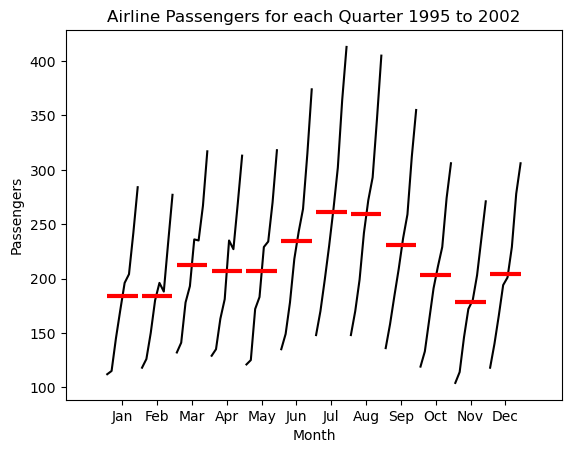

In [13]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(airline_data)
plt.title("Airline Passengers for each Quarter 1995 to 2002")
plt.xlabel('Month')
plt.ylabel("Passengers")
plt.show()

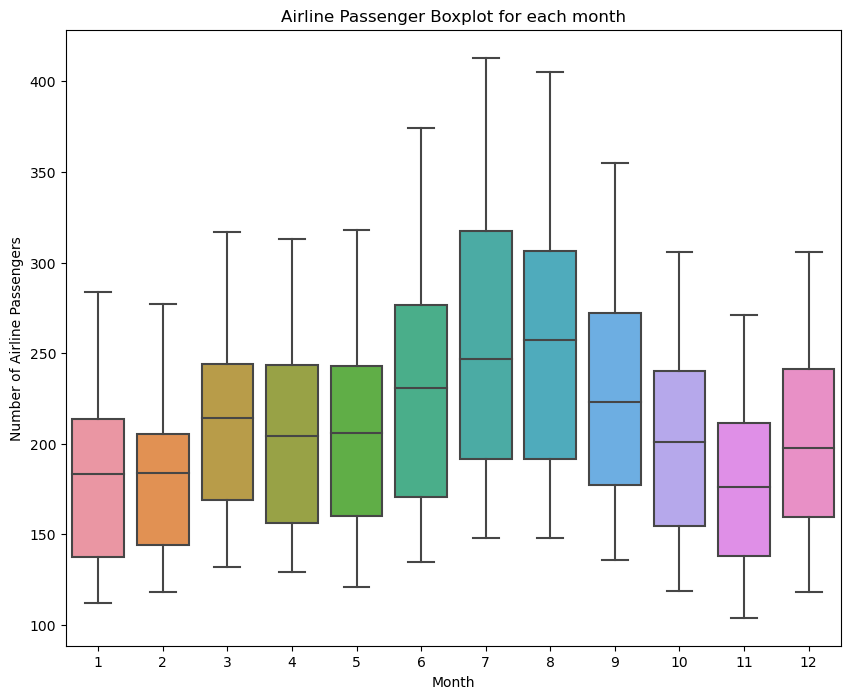

In [14]:
_,ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=airline_data.index.month, y = airline_data.Passengers,ax=ax)
plt.title("Airline Passenger Boxplot for each month")
plt.xlabel("Month")
plt.ylabel("Number of Airline Passengers")
plt.show()

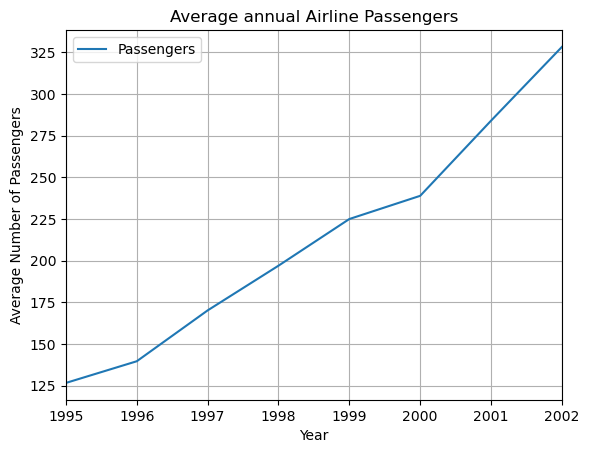

In [15]:
df_yearly_passen = airline_data.resample('A').mean()
df_yearly_passen.plot()
plt.title("Average annual Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Average Number of Passengers")
plt.grid()

## ETS(Error-Trend-Seasonality) decomposition of the data

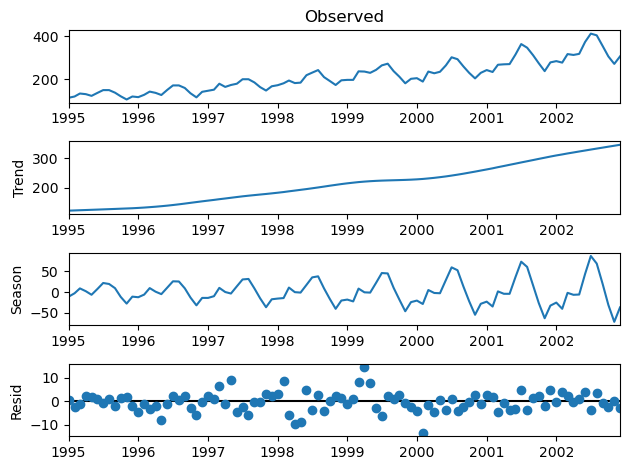

In [16]:
df = STL(airline_data).fit()
df.plot()
plt.show()

## Preprocessing of the Data

In [17]:
airline_data.shape

(96, 1)

In [18]:
train_data = airline_data[:84]
train_data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [19]:
test_data = airline_data[84:]
test_data.head()

,Passengers
Month,
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318


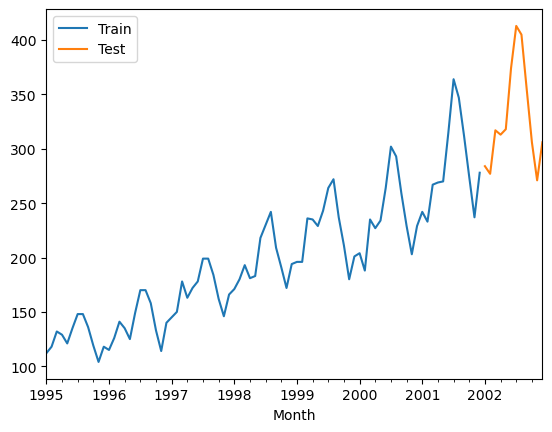

In [20]:
train_data['Passengers'].plot(legend = True, label= 'Train')
test_data['Passengers'].plot(legend = True, label = 'Test')
plt.show()

In [21]:
train_len = len(train_data)
test_len = len(test_data)

In [22]:
print(train_len,test_len)

84 12


## Build Models

### 1. Simple Exponential Smoothening

In [23]:
ses_model = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2)
result = ses_model.forecast(test_len)

C:\Users\radha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
predicted_passengers = test_data.copy()
predicted_passengers["SES"] = result
predicted_passengers.head()

,Passengers,SES
Month,,
2002-01-01,284,282.369838
2002-02-01,277,282.369838
2002-03-01,317,282.369838
2002-04-01,313,282.369838
2002-05-01,318,282.369838


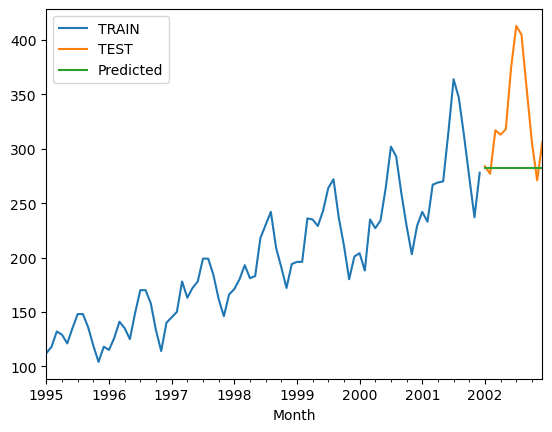

In [25]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST')
predicted_passengers['SES'].plot(legend=True,label='Predicted')
plt.show()

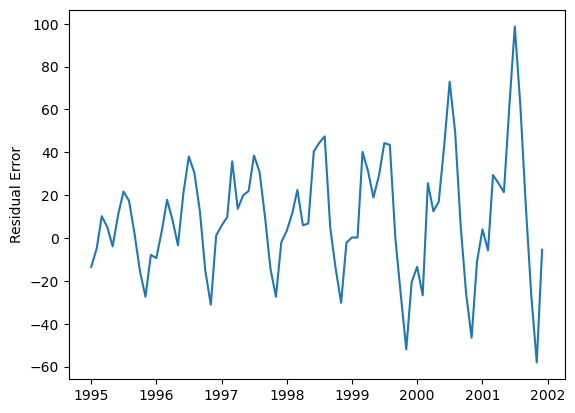

In [26]:
plt.plot(ses_model.resid)
plt.ylabel("Residual Error")
plt.show()

## Metrics of Model

In [27]:
model_residuals = pd.DataFrame(index = ['MSE','RMSE','MAE','MAPE'])

In [28]:
mse = np.round(mean_squared_error(test_data['Passengers'],predicted_passengers['SES']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Passengers'],predicted_passengers['SES']),3)
mape = round(mean_absolute_percentage_error(test_data,predicted_passengers['SES']),3)
model_residuals["SES"] = [mse,rmse,mae,mape]
model_residuals.head()

,SES
MSE,4204.843
RMSE,64.845
MAE,48.670
MAPE,0.134


## 2. Double Exponential Smoothening
#### a. Additive trend

In [29]:
des_add_trend = ExponentialSmoothing(train_data,trend='add').fit()
des_result = des_add_trend.forecast(test_len)

C:\Users\radha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
predicted_passengers["DES_add"] = des_result
predicted_passengers.head()

,Passengers,SES,DES_add
Month,,,
2002-01-01,284,282.369838,279.901134
2002-02-01,277,282.369838,281.852696
2002-03-01,317,282.369838,283.804258
2002-04-01,313,282.369838,285.755820
2002-05-01,318,282.369838,287.707382


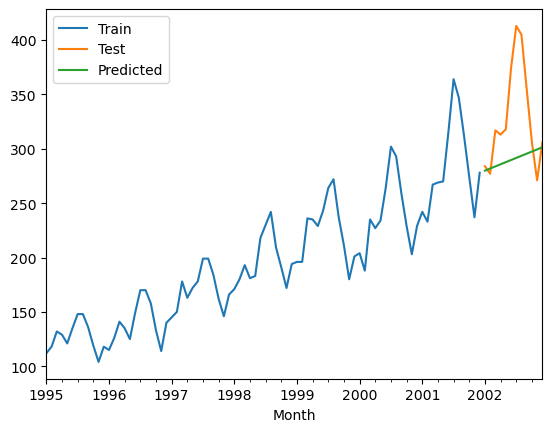

In [31]:
train_data['Passengers'].plot(legend = True,label='Train')
test_data['Passengers'].plot(legend = True, label = 'Test')
predicted_passengers['DES_add'].plot(legend = True, label = 'Predicted')
plt.show()

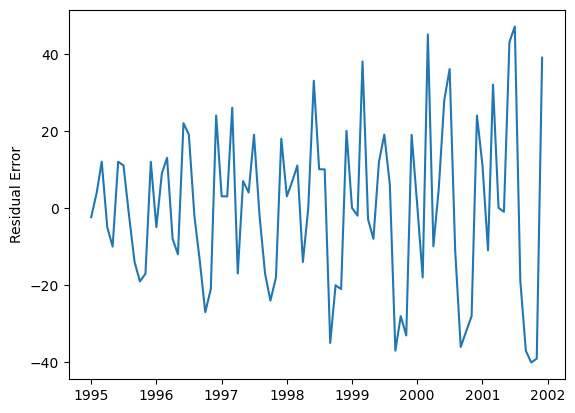

In [32]:
plt.plot(des_add_trend.resid)
plt.ylabel("Residual Error")
plt.show()

In [33]:
mse = np.round(mean_squared_error(test_data['Passengers'],predicted_passengers['DES_add']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Passengers'],predicted_passengers['DES_add']),3)
mape = round(mean_absolute_percentage_error(test_data,predicted_passengers['DES_add']),3)
model_residuals["DES_add"] = [mse,rmse,mae,mape]
model_residuals.head()

,SES,DES_add
MSE,4204.843,3459.156
RMSE,64.845,58.815
MAE,48.670,43.160
MAPE,0.134,0.119


## 2. Double Exponential Smoothening
#### b. Multiplicative Trend

In [34]:
des_mul_trend = ExponentialSmoothing(train_data,trend='mul').fit()
des_mul_res = des_mul_trend.forecast(test_len)

C:\Users\radha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
predicted_passengers["DES_mul"] = des_mul_res
predicted_passengers.head()

,Passengers,SES,DES_add,DES_mul
Month,,,,
2002-01-01,284,282.369838,279.901134,279.076941
2002-02-01,277,282.369838,281.852696,280.158084
2002-03-01,317,282.369838,283.804258,281.243414
2002-04-01,313,282.369838,285.755820,282.332950
2002-05-01,318,282.369838,287.707382,283.426706


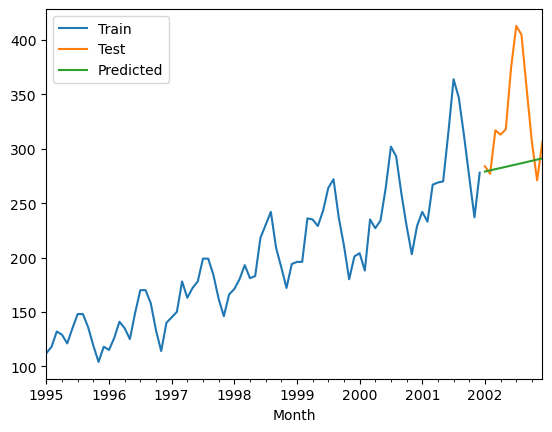

In [36]:
train_data['Passengers'].plot(legend = True,label='Train')
test_data['Passengers'].plot(legend = True, label = 'Test')
predicted_passengers['DES_mul'].plot(legend = True, label = 'Predicted')
plt.show()

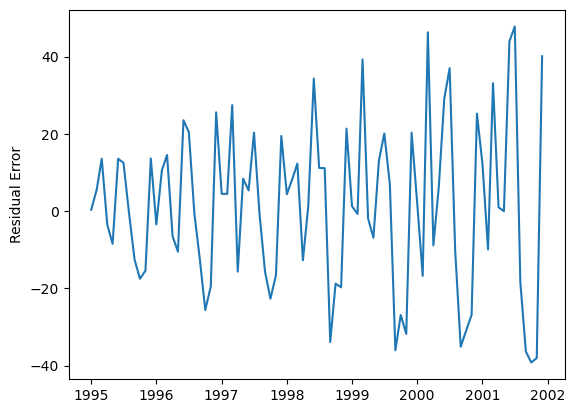

In [37]:
plt.plot(des_mul_trend.resid)
plt.ylabel("Residual Error")
plt.show()

In [38]:
mse = np.round(mean_squared_error(test_data['Passengers'],predicted_passengers['DES_mul']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Passengers'],predicted_passengers['DES_mul']),3)
mape = round(mean_absolute_percentage_error(test_data,predicted_passengers['DES_mul']),3)
model_residuals["DES_mul"] = [mse,rmse,mae,mape]
model_residuals.head()

,SES,DES_add,DES_mul
MSE,4204.843,3459.156,3920.705
RMSE,64.845,58.815,62.616
MAE,48.670,43.160,46.855
MAPE,0.134,0.119,0.129


## Triple Exponential Smoothening 
#### 1. With Additive trend and Additive seasonality 

In [39]:
tes_add_add = ExponentialSmoothing(train_data,trend='add',seasonal='add').fit()
res_add_add = tes_add_add.forecast(test_len)

C:\Users\radha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
predicted_passengers['TES_add_add'] = res_add_add
predicted_passengers.head()

,Passengers,SES,DES_add,DES_mul,TES_add_add
Month,,,,,
2002-01-01,284,282.369838,279.901134,279.076941,280.937617
2002-02-01,277,282.369838,281.852696,280.158084,281.797264
2002-03-01,317,282.369838,283.804258,281.243414,309.082962
2002-04-01,313,282.369838,285.755820,282.332950,302.941823
2002-05-01,318,282.369838,287.707382,283.426706,302.223210


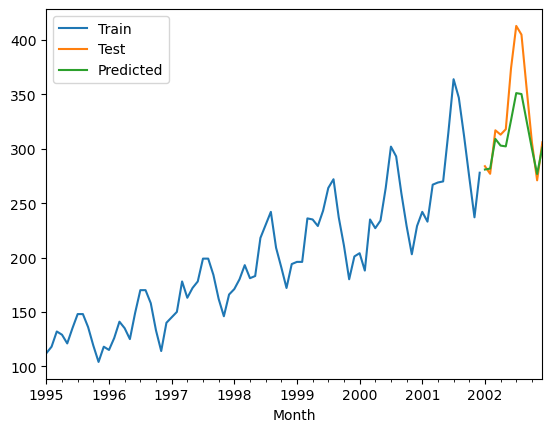

In [41]:
train_data['Passengers'].plot(legend = True,label='Train')
test_data['Passengers'].plot(legend = True, label = 'Test')
predicted_passengers['TES_add_add'].plot(legend = True, label = 'Predicted')
plt.show()

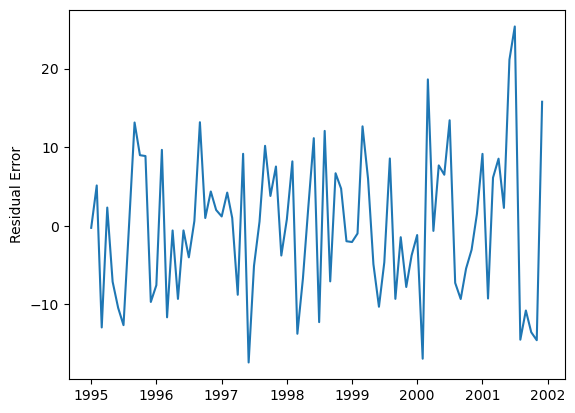

In [42]:
plt.plot(tes_add_add.resid)
plt.ylabel("Residual Error")
plt.show()

In [43]:
mse = np.round(mean_squared_error(test_data['Passengers'],predicted_passengers['TES_add_add']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Passengers'],predicted_passengers['TES_add_add']),3)
mape = round(mean_absolute_percentage_error(test_data,predicted_passengers['TES_add_add']),3)
model_residuals["TES_add_add"] = [mse,rmse,mae,mape]
model_residuals.head()

,SES,DES_add,DES_mul,TES_add_add
MSE,4204.843,3459.156,3920.705,875.720
RMSE,64.845,58.815,62.616,29.593
MAE,48.670,43.160,46.855,21.017
MAPE,0.134,0.119,0.129,0.057


## Triple Exponential Smoothening 
#### 2. With Additive trend and Multiplicative seasonality 

In [44]:
tes_add_mul = ExponentialSmoothing(train_data,trend='add',seasonal='mul').fit()
res_add_mul = tes_add_mul.forecast(test_len)

C:\Users\radha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
predicted_passengers['TES_add_mul'] = res_add_mul
predicted_passengers.head()

,Passengers,SES,DES_add,DES_mul,TES_add_add,TES_add_mul
Month,,,,,,
2002-01-01,284,282.369838,279.901134,279.076941,280.937617,281.192868
2002-02-01,277,282.369838,281.852696,280.158084,281.797264,278.385153
2002-03-01,317,282.369838,283.804258,281.243414,309.082962,322.560590
2002-04-01,313,282.369838,285.755820,282.332950,302.941823,312.457706
2002-05-01,318,282.369838,287.707382,283.426706,302.223210,311.025408


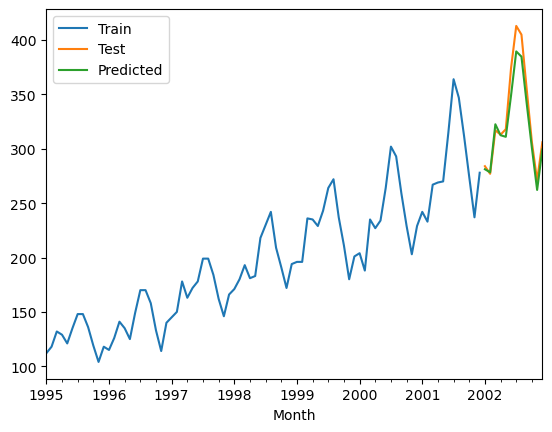

In [46]:
train_data['Passengers'].plot(legend = True,label='Train')
test_data['Passengers'].plot(legend = True, label = 'Test')
predicted_passengers['TES_add_mul'].plot(legend = True, label = 'Predicted')
plt.show()

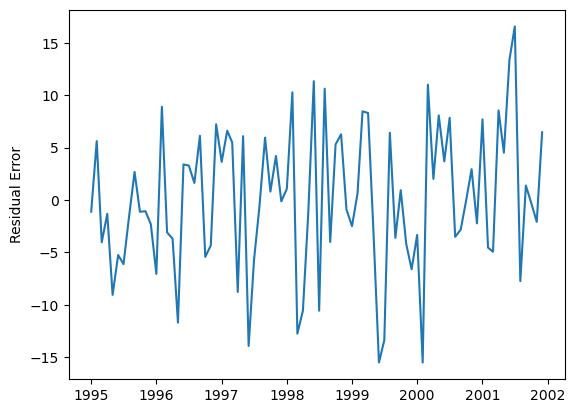

In [47]:
plt.plot(tes_add_mul.resid)
plt.ylabel("Residual Error")
plt.show()

In [48]:
mse = np.round(mean_squared_error(test_data['Passengers'],predicted_passengers['TES_add_mul']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Passengers'],predicted_passengers['TES_add_mul']),3)
mape = round(mean_absolute_percentage_error(test_data,predicted_passengers['TES_add_mul']),3)
model_residuals["TES_add_mul"] = [mse,rmse,mae,mape]
model_residuals.head()

,SES,DES_add,DES_mul,TES_add_add,TES_add_mul
MSE,4204.843,3459.156,3920.705,875.720,166.904
RMSE,64.845,58.815,62.616,29.593,12.919
MAE,48.670,43.160,46.855,21.017,9.995
MAPE,0.134,0.119,0.129,0.057,0.028


## Triple Exponential Smoothening 
#### 3. With Multiplicative trend and Additive seasonality 

In [49]:
tes_mul_add = ExponentialSmoothing(train_data,trend='mul',seasonal='add').fit()
res_mul_add = tes_mul_add.forecast(test_len)

C:\Users\radha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
predicted_passengers['TES_mul_add'] = res_mul_add
predicted_passengers.head()

,Passengers,SES,DES_add,DES_mul,TES_add_add,TES_add_mul,TES_mul_add
Month,,,,,,,
2002-01-01,284,282.369838,279.901134,279.076941,280.937617,281.192868,281.694532
2002-02-01,277,282.369838,281.852696,280.158084,281.797264,278.385153,283.447327
2002-03-01,317,282.369838,283.804258,281.243414,309.082962,322.560590,311.642258
2002-04-01,313,282.369838,285.755820,282.332950,302.941823,312.457706,306.406284
2002-05-01,318,282.369838,287.707382,283.426706,302.223210,311.025408,306.613131


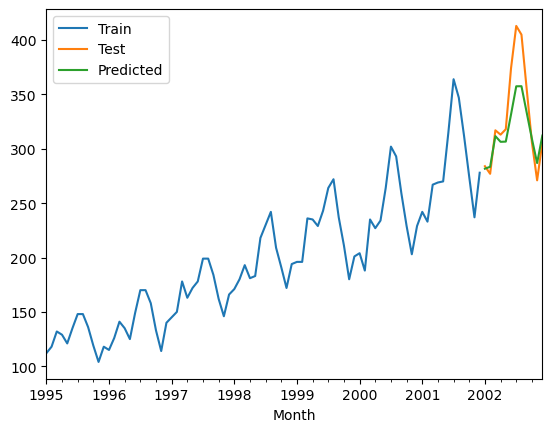

In [51]:
train_data['Passengers'].plot(legend = True,label='Train')
test_data['Passengers'].plot(legend = True, label = 'Test')
predicted_passengers['TES_mul_add'].plot(legend = True, label = 'Predicted')
plt.show()

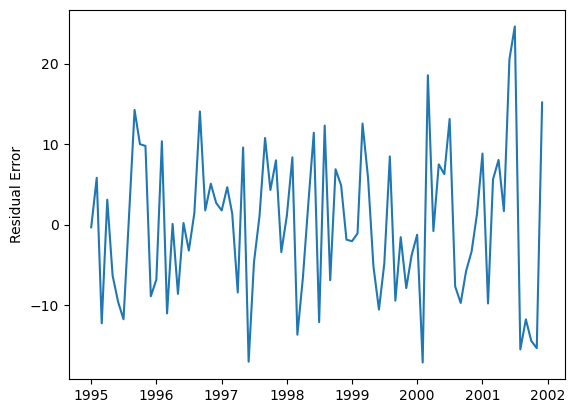

In [52]:
plt.plot(tes_mul_add.resid)
plt.ylabel("Residual Error")
plt.show()

In [53]:
mse = np.round(mean_squared_error(test_data['Passengers'],predicted_passengers['TES_mul_add']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Passengers'],predicted_passengers['TES_mul_add']),3)
mape = round(mean_absolute_percentage_error(test_data,predicted_passengers['TES_mul_add']),3)
model_residuals["TES_mul_add"] = [mse,rmse,mae,mape]
model_residuals.head()

,SES,DES_add,DES_mul,TES_add_add,TES_add_mul,TES_mul_add
MSE,4204.843,3459.156,3920.705,875.720,166.904,679.472
RMSE,64.845,58.815,62.616,29.593,12.919,26.067
MAE,48.670,43.160,46.855,21.017,9.995,18.697
MAPE,0.134,0.119,0.129,0.057,0.028,0.052


## Triple Exponential Smoothening 
#### 4. With Multiplicative trend and Multiplicative seasonality 

In [54]:
tes_mul_mul = ExponentialSmoothing(train_data,trend='mul',seasonal='mul').fit()
res_mul_mul = tes_mul_mul.forecast(test_len)

C:\Users\radha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
predicted_passengers['TES_mul_mul'] = res_mul_mul
predicted_passengers.head()

,Passengers,SES,DES_add,DES_mul,TES_add_add,TES_add_mul,TES_mul_add,TES_mul_mul
Month,,,,,,,,
2002-01-01,284,282.369838,279.901134,279.076941,280.937617,281.192868,281.694532,282.794997
2002-02-01,277,282.369838,281.852696,280.158084,281.797264,278.385153,283.447327,281.344764
2002-03-01,317,282.369838,283.804258,281.243414,309.082962,322.560590,311.642258,327.550877
2002-04-01,313,282.369838,285.755820,282.332950,302.941823,312.457706,306.406284,318.798902
2002-05-01,318,282.369838,287.707382,283.426706,302.223210,311.025408,306.613131,318.781617


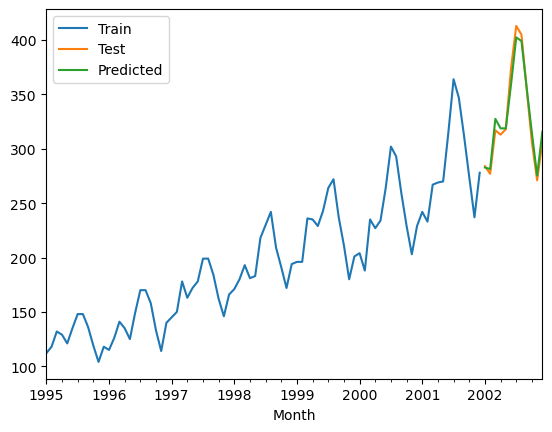

In [56]:
train_data['Passengers'].plot(legend = True,label='Train')
test_data['Passengers'].plot(legend = True, label = 'Test')
predicted_passengers['TES_mul_mul'].plot(legend = True, label = 'Predicted')
plt.show()

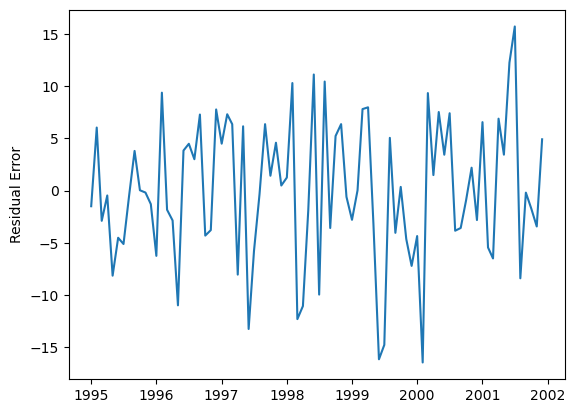

In [57]:
plt.plot(tes_mul_mul.resid)
plt.ylabel("Residual Error")
plt.show()

In [58]:
mse = np.round(mean_squared_error(test_data['Passengers'],predicted_passengers['TES_mul_mul']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Passengers'],predicted_passengers['TES_mul_mul']),3)
mape = round(mean_absolute_percentage_error(test_data,predicted_passengers['TES_mul_mul']),3)
model_residuals["TES_mul_mul"] = [mse,rmse,mae,mape]
model_residuals.head()

,SES,DES_add,DES_mul,TES_add_add,TES_add_mul,TES_mul_add,TES_mul_mul
MSE,4204.843,3459.156,3920.705,875.720,166.904,679.472,60.180
RMSE,64.845,58.815,62.616,29.593,12.919,26.067,7.758
MAE,48.670,43.160,46.855,21.017,9.995,18.697,6.473
MAPE,0.134,0.119,0.129,0.057,0.028,0.052,0.019


## Triple Exponential Smoothening with multplicative trend and multiplicative seasonality predicts the test data with least possible error


## The model will now be rebuilt considering the entire data set and it can be used to forecast values for 12 months 

In [59]:
final_model = ExponentialSmoothing(airline_data,trend='mul',seasonal='mul').fit()
result_final = final_model.forecast(test_len)

C:\Users\radha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


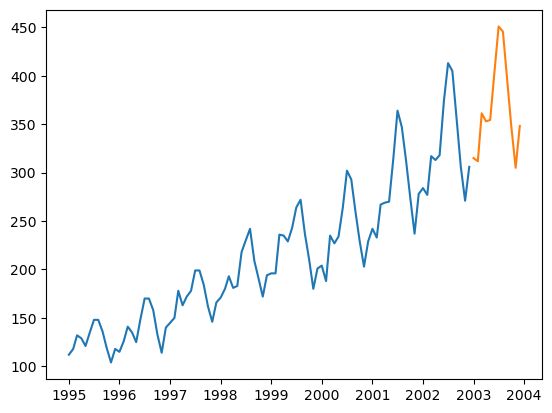

In [60]:
plt.plot(airline_data)
plt.plot(result_final)
plt.show()

In [61]:
final_model.resid.mean()

0.04073857274504785

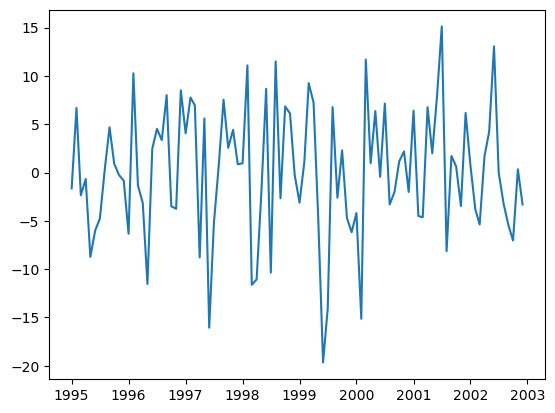

In [62]:
plt.plot(final_model.resid)
plt.show()

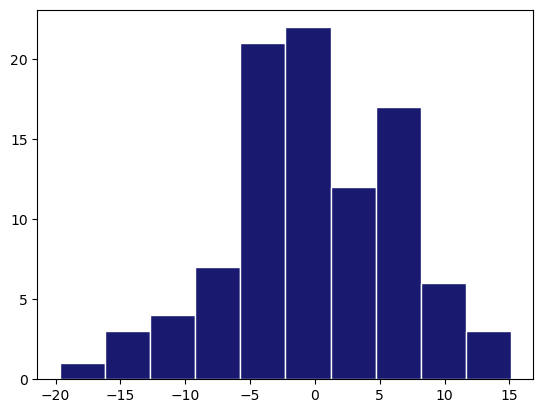

In [63]:
plt.hist(final_model.resid,color='midnightblue',edgecolor='w')
plt.show()

## The model finally created with the full data i.e. Triple Exponential smoothening seems suitable for data and can be used to predict the number od customers for next 12 months. Further, the error also seems normally distributed for the model 